## Single layer perceptron 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('suv dataset.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'User ID': [15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 1570

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
# Select relevant features and target
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# z score (-3 to +3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [13]:
X_test

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871],
       [-0.28178945, -0.15362871],
       [ 1.4843773 , -1.05540195],
       [-1.45923396, -0.64814952],
       [-1.75359508, -1.37538601],
       [-0.77239133,  0.4863394 ],
       [-0.28178945,  1.09721805],
       [ 1.38625693, -0.93904411],
       [ 0.79753468,  0.10817643],
       [ 0.11069205, -0.82268628],
       [ 1.77873843, -0.29907601],
       [-1.55735433, -1.25902817],
       [-0.87051171,  0.28271318],
       [ 0.89565505, -1.37538601],
       [ 2.07309956,  0.16635535],
       [-1.85171546, -1.49174384],
       [ 1.28813655, -1.37538601],
       [ 0.40505317,  0.28271318],
       [-0.0855487 , -0.50270222],
       [ 1.68061805,

In [14]:

model = Perceptron(max_iter=1000, eta0=1.0, random_state=42) # eta 0.0001 and 1.
model.fit(X_train, y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [15]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.2f}")


 Accuracy: 0.76


In [16]:
# Assign columns to descriptive variable names
# X = df[['Age', 'EstimatedSalary']].values
age = X_train[:, 0]
salary = X_train[:, 1]
print (age)

[-1.06675246  0.79753468  0.11069205  0.60129393  1.87685881 -0.57615058
  0.3069328   0.99377543 -1.16487283 -1.55735433  1.0918958  -0.18366908
  0.20881242  0.3069328  -1.16487283  0.11069205  2.07309956  0.40505317
  1.4843773  -0.37990983  1.87685881  0.11069205  0.89565505 -1.36111358
 -0.18366908 -0.57615058  0.99377543 -0.77239133  2.17121993  0.01257167
 -0.4780302   0.11069205  1.68061805  1.0918958   0.50317355 -1.06675246
 -1.16487283 -0.0855487   0.40505317 -0.28178945 -0.87051171  0.01257167
  0.6994143   1.58249768  0.79753468 -1.45923396 -0.0855487   0.40505317
 -0.28178945  1.28813655  0.11069205 -1.36111358  1.97497918 -1.26299321
  0.3069328  -0.96863208  0.40505317  0.40505317  0.79753468  0.89565505
 -0.4780302  -1.85171546  1.0918958  -0.67427095 -0.77239133  0.99377543
 -0.57615058 -0.0855487  -1.94983583  0.40505317 -1.06675246  0.20881242
  1.87685881 -1.16487283 -1.16487283 -0.87051171 -0.4780302   0.11069205
  1.58249768 -0.18366908  0.79753468  0.20881242 -0

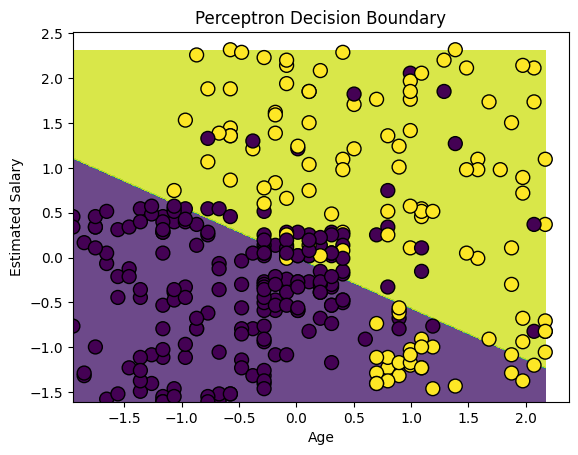

In [42]:


# Create a mesh grid using exact min and max values
x_min, x_max = age.min(), age.max()
y_min, y_max = salary.min(), salary.max()
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Predict class labels for all points in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(age, salary, c=y_train, edgecolors='k', marker='o', s=100)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
